In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df1=df.replace(0,np.NAN)
print(df1.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace = True)
df1['Insulin'].fillna(df1['Insulin'].median(),inplace = True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
df1['BMI'].fillna(df1['BMI'].median(), inplace = True)
df1['Pregnancies'].fillna(value= 0, inplace = True)
df1['Outcome'].fillna(value=0, inplace = True)



In [34]:
df1.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0      72.000000           35.0    125.0  33.6   
1          1.0     85.0      66.000000           29.0    125.0  26.6   
2          8.0    183.0      64.000000           29.0    125.0  23.3   
3          1.0     89.0      66.000000           23.0     94.0  28.1   
4          0.0    137.0      40.000000           35.0    168.0  43.1   
5          5.0    116.0      74.000000           29.0    125.0  25.6   
6          3.0     78.0      50.000000           32.0     88.0  31.0   
7         10.0    115.0      72.405184           29.0    125.0  35.3   
8          2.0    197.0      70.000000           45.0    543.0  30.5   
9          8.0    125.0      96.000000           29.0    125.0  32.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      1.0  
1                     0.351   31      0.0  
2                     0.672   32      1.0  
3                     0.167   21      0.0  
4                     2.288   33      1.0  
5                     0.201   30      0.0  
6                     0.248   26      1.0  
7                     0.134   29      0.0  
8                     0.158   53      1.0  
9                     0.232   54      1.0

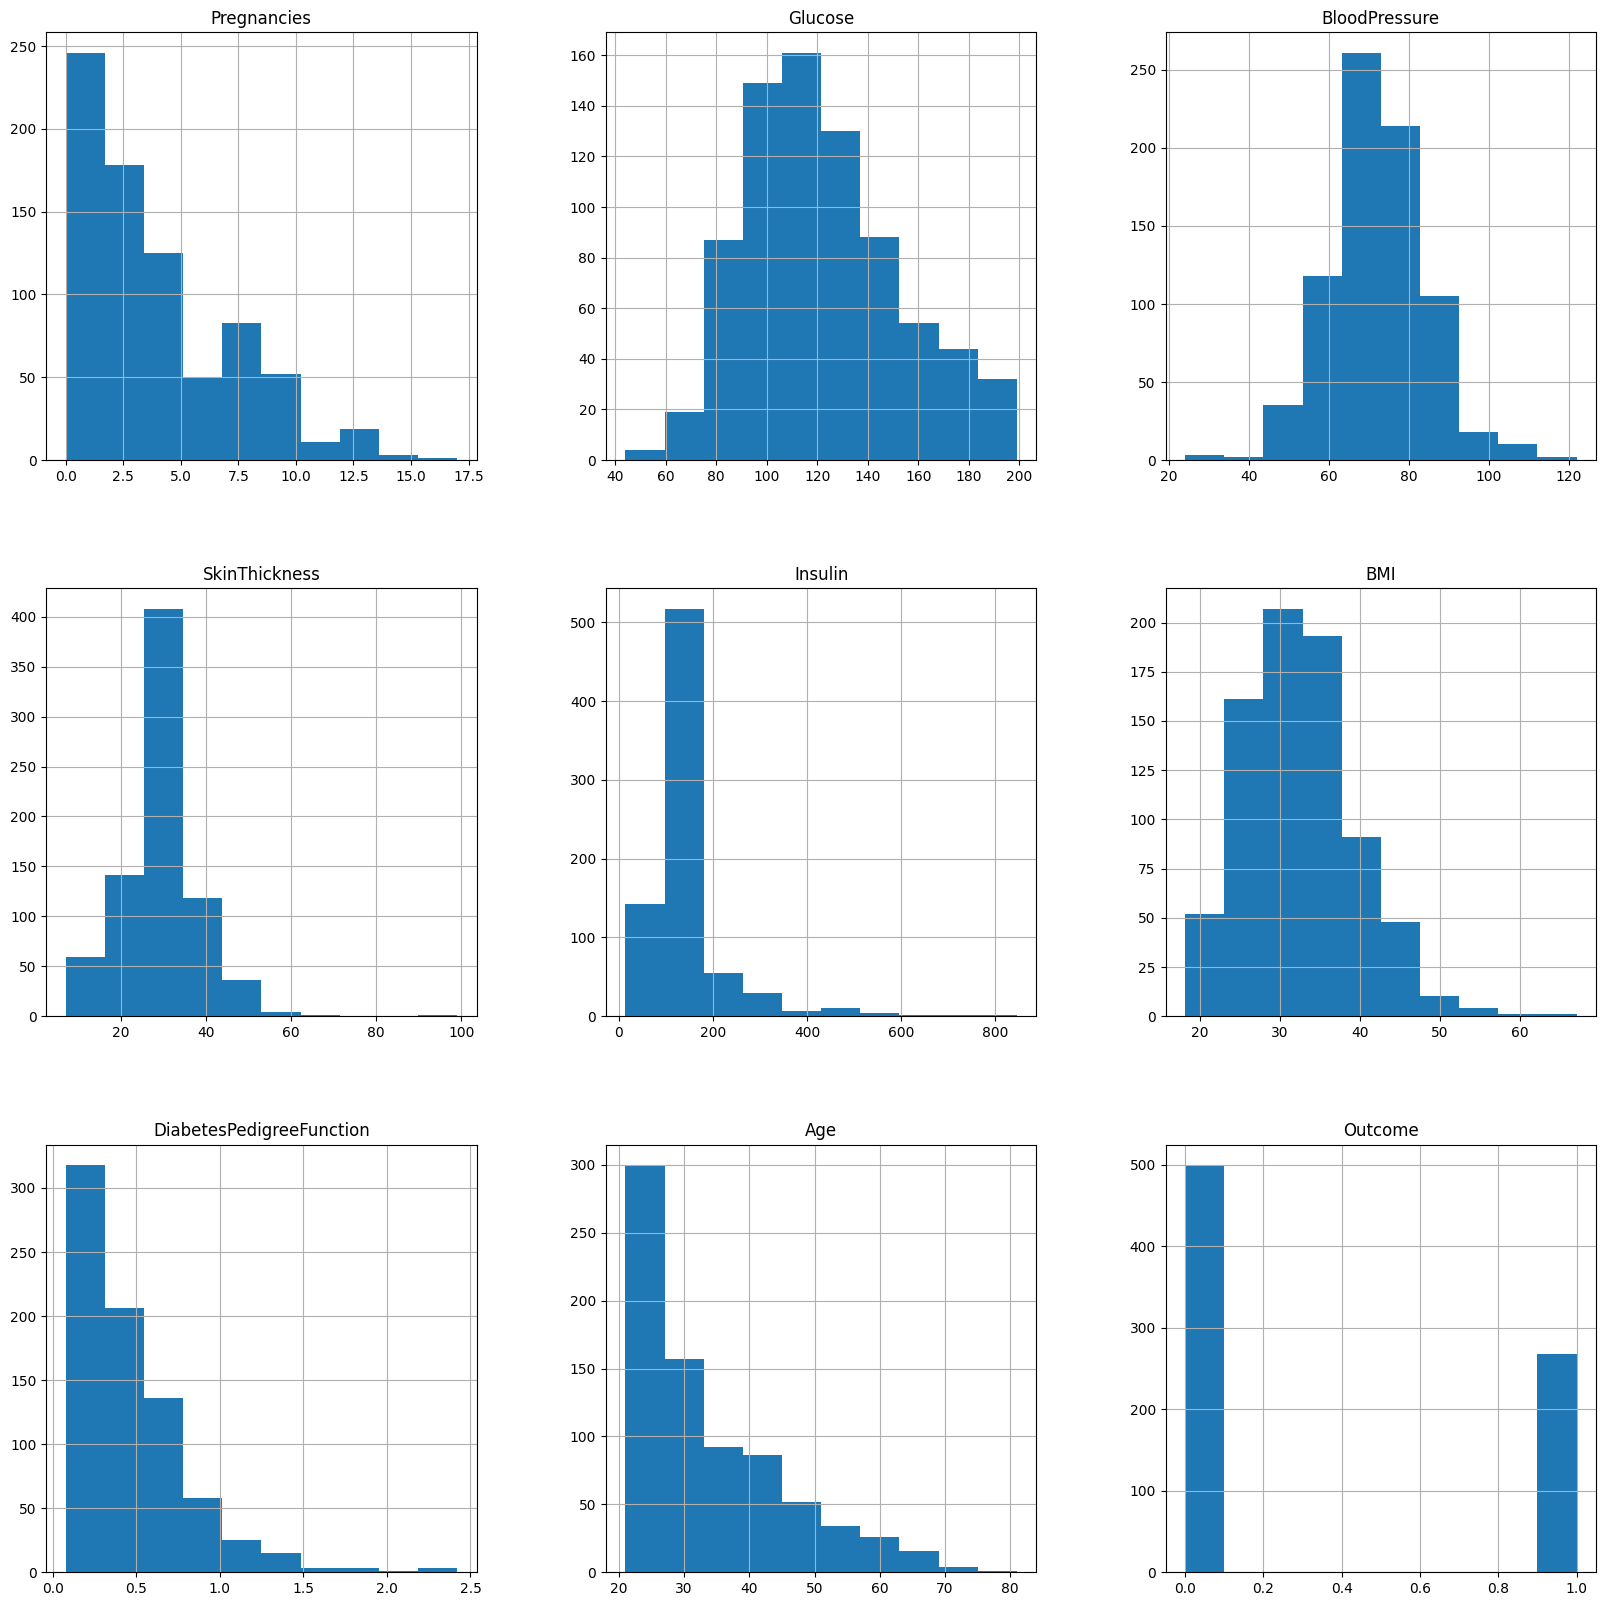

In [11]:
p = df1.hist(figsize = (20,20))

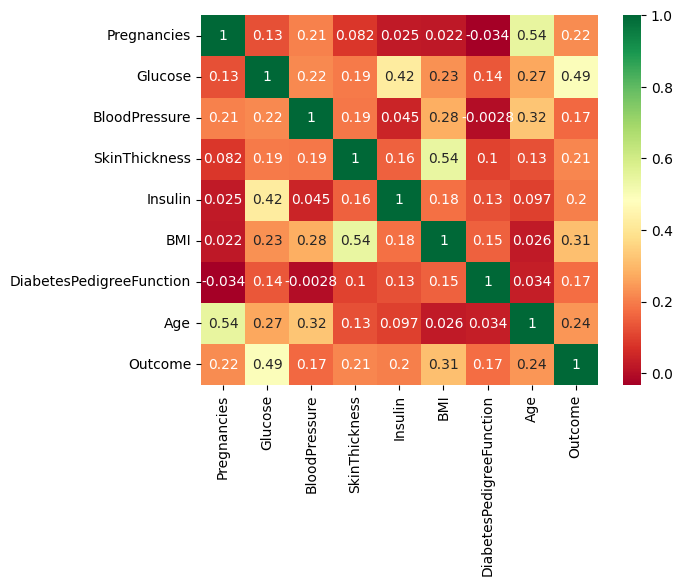

In [10]:
p = sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')

# SPLITTING TRAINING AND TESTING MODEL

In [27]:
X=df1.drop('Outcome',axis=1)
y=df1['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# K NEAREST NEIGHBORS CLASSIFICATION METHOD

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
error=[]
for k in range(100):
    k=k+1
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error.append(np.mean(pred != y_test))
    print('Error value for k= ' , k , 'is:', np.min(error))
    
    

Error value for k=  1 is: 0.3543307086614173
Error value for k=  2 is: 0.3110236220472441
Error value for k=  3 is: 0.3110236220472441
Error value for k=  4 is: 0.2874015748031496
Error value for k=  5 is: 0.2874015748031496
Error value for k=  6 is: 0.2874015748031496
Error value for k=  7 is: 0.2874015748031496
Error value for k=  8 is: 0.2874015748031496
Error value for k=  9 is: 0.2874015748031496
Error value for k=  10 is: 0.2874015748031496
Error value for k=  11 is: 0.2677165354330709
Error value for k=  12 is: 0.2677165354330709
Error value for k=  13 is: 0.2677165354330709
Error value for k=  14 is: 0.2677165354330709
Error value for k=  15 is: 0.2677165354330709
Error value for k=  16 is: 0.25984251968503935
Error value for k=  17 is: 0.25984251968503935
Error value for k=  18 is: 0.25984251968503935
Error value for k=  19 is: 0.25984251968503935
Error value for k=  20 is: 0.25984251968503935
Error value for k=  21 is: 0.25984251968503935
Error value for k=  22 is: 0.25984251

<Axes: >

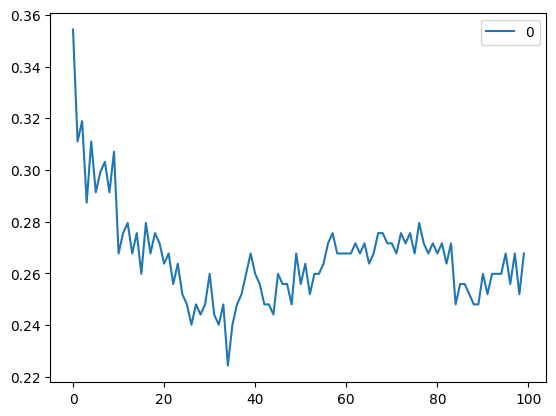

In [29]:
curve = pd.DataFrame(error) #elbow curve 
curve.plot()

In [30]:
model = KNeighborsClassifier(n_neighbors =35)
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=35)

In [31]:
ypred= model.predict(X_test)
print(ypred)

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypred)
acc

0.7755905511811023

In [33]:
model.predict([[0,137,40,35,168,43.1,2.228,33]])

C:\Users\visak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

# Random Forest Classifier Method

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [103]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [23]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7716535433070866


In [105]:
rfc.predict(X_test)

array([0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1.

In [45]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]])

C:\Users\visak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\visak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predictions1 = logmodel.predict(X_test)

In [24]:
from sklearn import metrics


print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions1)))

Accuracy_Score = 0.7440944881889764
